<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
phase2 (chocolate sale)
</font>
</h1>


<p>
continue with chocolate_preprocessed.csv from last step
</p>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("chocolate_preprocessed.csv")
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,Blend,Peru


<p>
we want to scale rating to 0-100
</p>

In [2]:
maxRating = 100/np.max(df["Rating"])
df['Rating'] = df["Rating"]*maxRating


<p>
assume each 100gr chocolate with greatest quality has 25 Toman price, now we want to make new col name "price(100g)" and calculate price of each row like below

<center>
price(100g) = cocoa percent * rating * 25
<center>
</p>

In [3]:
df['price(100g)'] = df["Cocoa Percent"]*df["Rating"]*25

<p>
show relation between rating and price(100g) with regression use seaborn regplot
</p>


<AxesSubplot:xlabel='Rating', ylabel='price(100g)'>

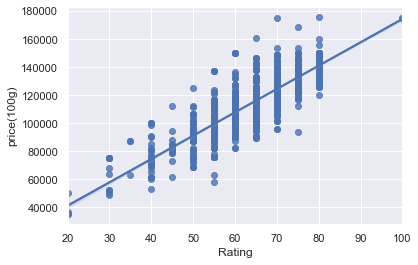

In [4]:
import seaborn as sns
sns.set_theme()
sns.regplot(x = df.Rating, y = df['price(100g)'])

<p>
want to seprated chocolate to two group. dark chocolate(more than 70% cocoa) and good sweet chocolate(less than 70%)
</p>

In [5]:
dark_chocolates = df[df["Cocoa Percent"]>70]
good_chocolates = df[df["Cocoa Percent"]<=70]

<p>
chocolate with "Trinitario" bean has good quality and we want to increace price of them 10%
</p>

In [6]:
has_Trinitario = dark_chocolates["Bean Type"].str.contains("Trinitario")
dark_chocolates.loc[has_Trinitario,"price(100g)"] *=1.1

<p>
find total price of selling dark chocolates
</p>

In [7]:
priceSum = dark_chocolates["price(100g)"].sum()
priceSum

96733662.5

<p>
we will use chocolate_price.csv in next step
</p>

In [8]:
good_chocolates.to_csv('chocolate_price.csv',index = False)